In [ ]:
# Bulldozer sale prediciton is a regression task and for predicting te model ,  algorithm used is RandomForest
# The depedent variable is Sale Price and independent variable is rest all attributes like machineID, Saledata etc.
# The evaluation metric used here is RMSLE (Root mean square Log Error).In this We first take the mean of squared 
# differences of log values. We take a square root of the result obtained. 
# This is equivalent to calculating the root mean squared error (rmse) of log of the values.
# The R^2 is a statistical measure of how close the data are to the fittest line


In [63]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from fastai.imports import*
from fastai.tabular import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

In [4]:
# Reaing the CSV data file(Train file)

In [5]:
data_read=pd.read_csv('Train.csv', low_memory=False, parse_dates=["saledate"])

In [66]:
data_read.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def display_alldata(df):
 with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
    display(df)

In [69]:
display_alldata(data_read.head().transpose())

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
# Data Preprocessing as we can see so many categorical values in data frame like sale data Usage band .Its necessary to 
# convert categorical value to numerical value to feed into tree.

In [34]:
datavalue=np.log(data_read.SalePrice)

In [37]:
print(datavalue)

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64


In [70]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())   
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [71]:
fld = data_read.saledate
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [72]:
add_datepart(data_read, 'saledate')


In [74]:
data_read.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [77]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):  df[n] = c.astype('category').cat.as_ordered()

In [83]:
train_cats(data_read)

In [85]:
data_read.UsageBand.cat.set_categories(['High', 'Medium', 'Low'],
    ordered=True, inplace=True)

In [ ]:
# The below code is used to find the null values in dataframe as we can seeeso many nullvalues(NAN)

In [86]:
display_alldata(data_read.isnull().sum().sort_index()/len(data_read))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [89]:
os.makedirs('featherformat', exist_ok=True)
data_read.to_feather('tmp/featherfile')

In [90]:
data_read = pd.read_feather('tmp/featherfile')

In [ ]:
# The below functions viz fix_missing, numericalize , cat_to_numeric three function is used to remove null values and to 
# convert categorical values to numerical value

In [7]:
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [8]:
def numericalize(df, col, name, max_n_cat):
     if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1

In [9]:
def cat_to_numeric(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [12]:
df, y, nas = cat_to_numeric(data_read, 'SalePrice')

In [11]:
df.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,2,2,1,1,3
saledate,2647,2148,2131,3753,3281
fiModelDesc,950,1725,331,3674,4208


In [ ]:
# Now we will train the model using dataset in which dependent variable is SalePrice and rest all are independent variable. Here as this is a 
# regression task so we use random forest regressor

In [13]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/home/abdul/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.982506543468755

In [ ]:
# We have split tha dataset into train and valid in which training data shape as 389125-rows and 54-columns and valid data 
# set contents 12000-rows and 54 columns


In [16]:
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()
n_valid = 12000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data_read, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((389125, 54), (389125,), (12000, 54))

In [22]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res) 
m=RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/abdul/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 13s, sys: 274 ms, total: 1min 13s
Wall time: 23.3 s
[3053.999092533897, 8615.798772796306, 0.9823652537442809, 0.8737567902681392]


In [ ]:
# From above reult we can say that -
# the training rmse is 0.3053 and validation rmse is 0.86. The r(square) value for training is 0.98 and r(saquare) for 
# valiadtion is 0.87. 

In [25]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_]) 
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9000., 10000.,  9000., 10000.,  9000.,  9000., 16000.,  9000., 10000., 10000.]),
 10100.0,
 9000)

In [24]:
preds.shape

(10, 12000)

In [26]:
# Each tree is stored in an attribute called estimators_ . 
# For each tree, we will  predict with our validation set. 
# np.stack concatenates them together on a new axis,
# so the resulting preds has the shape of (10, 12000) (10 trees, 12000 validation set). 
# The mean of 10 predictions for the first data is 10, and the actual value is 9. 

In [ ]:
# now lets tune the hyperparameter and see the result.Here the hyperparameter is estimators.

In [27]:
m=RandomForestRegressor(n_estimators=20,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2min 36s, sys: 695 ms, total: 2min 36s
Wall time: 43.6 s
[2775.4709165699182, 8241.811514463157, 0.9854351918180747, 0.8844786408164632]


In [28]:
m=RandomForestRegressor(n_estimators=40,n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5min 10s, sys: 927 ms, total: 5min 11s
Wall time: 1min 21s
[2632.942989539121, 8130.479245490734, 0.9868926674324792, 0.8875785390919012]


In [ ]:
# Increasing the number of trees or estimators doesn't make much difference in the predicted value and actual value.
# Adding more trees slows it down, but with less trees you can still draw some conclusion.

In [ ]:
# plot of R^2 vs Numer of trees . As we increase the number of trees the curve becomes almost flat

Text(0, 0.5, 'R^2')

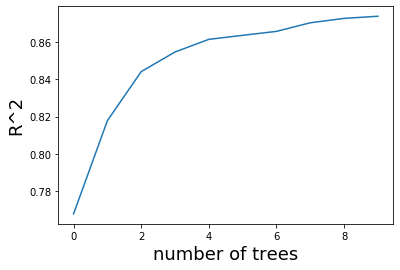

In [30]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);
plt.xlabel('number of trees', fontsize=18)
plt.ylabel('R^2', fontsize=18)